In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    #'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
def read_logfilebmm(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                b, m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3)), int(match.group(4))
                throughput = float(match.group(5))
                throughputs.append({'b': b, 'm': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs

def read_logfilemm(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3))
                throughput = float(match.group(4))
                throughputs.append({'m': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs


def read_logfile_mm_bmm(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for concat (\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3))
                throughput = float(match.group(4))
                throughputs.append({'m': m, 'n': n, 'k': k, 'b':0,
                                    'throughput': throughput})
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+), b=(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k, b = int(match.group(1)), int(match.group(2)), int(match.group(3)), int(match.group(4))
                throughput = float(match.group(5))
                throughputs.append({'b': b, 'm': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs


In [3]:
def plot_throughputs(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    #area of degredation for linproj
    #min_size = 22976 #10240-128 
    #max_size = 25024 #32768+128
    print(throughputs)
    #separate area
    #min_size = 25024 #10240-128 
    #max_size = 25024 + 30 * 64 #32768+128
    for label_variable_value in label_variable_values:
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if #x[xaxis_variable]%32==0 and
                          x[label_variable] == label_variable_value
                          #and x[xaxis_variable] >= min_size
                          #and x[xaxis_variable] <= max_size
                          ]

        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{label_variable}={label_variable_value}', marker='o', markevery=markevery)
    
    #ax.set_title("Throughput of (2048x4x4k)X(4kxk) GEMMs")
    #ax.set_title("Throughput of (bxmxn)X(nxk) GEMMs")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #ax.set_ylim(0, None)
    ax.set_yticks(yticks)
    #ax.set_xscale('log', base=2)
    #plt.legend(frameon=False, ncol=2)


    '''fig, ax = plt.subplots(len(label_variable_values), 1, figsize=(10, 4.5 * len(label_variable_values)), tight_layout=True)

    #min_size = 22976 #10240-128
    #max_size = 25024 #32768+128
    for idx,label_variable_value in enumerate(label_variable_values):
        
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if x[xaxis_variable]%64==0
                          and x[label_variable] == label_variable_value
                          #and x[xaxis_variable] >= min_size
                          #and x[xaxis_variable] <= max_size
                          ]

        ax[idx].plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{label_variable}={label_variable_value}', marker='o', markevery=markevery)
    
        ax[idx].set_title(f"{label_variable} = {label_variable_value}")
        ax[idx].set_xlabel(xlabel)
        ax[idx].set_ylabel(ylabel)
        #ax.set_ylim(0, None)
        #ax.set_yticks(yticks)
        ax[idx].set_xscale('log', base=2)
    sns.despine()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')'''
    plt.show()

def plot_throughputs_base(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    for label_variable_value in label_variable_values:
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if x[label_variable] == label_variable_value]
        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{label_variable}={label_variable_value}', marker='o', markevery=markevery)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, None)
    ax.set_yticks(yticks)
    ax.set_xscale('log', base=2)
    plt.legend(frameon=False, ncol=2)    
    sns.despine()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

    
def plot_throughputs_mm_bmm(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    labels = ["m","m","m"]
    blabels = [2048,4,0]
    #label_variable_values = [1,2,4]
    for i in range(len(labels)):
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if x[labels[i]] == label_variable_values[i]]
        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{labels[i]}={label_variable_values[i]}, b={blabels[i]}', marker='o', markevery=markevery)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #ax.set_ylim(0, None)
    ax.set_yticks(yticks)
    ax.set_xscale('log', base=2)
    plt.legend(frameon=False, ncol=1)    
    sns.despine()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')
    plt.show()



    
def plot_throughputs_with_quant_boundaries(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    #area of degredation for linproj
    min_size = 22976-256 #10240-128 
    max_size = 25024+256 #32768+128

    #separate area
    #min_size = 25024 #10240-128 
    #max_size = 25024 + 30 * 64 #32768+128
    for label_variable_value in label_variable_values:
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if x[xaxis_variable]%64==0
                          and x[label_variable] == label_variable_value
                          and x[xaxis_variable] >= min_size
                          and x[xaxis_variable] <= max_size
                          ]

        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{label_variable}={label_variable_value}', marker='o', markevery=markevery, alpha=0.3)
    sizes = np.arange(min_size,max_size,64)
    newTile = sizes[((sizes/64)%2==1)]
    ax.scatter(newTile,[x['throughput'] for x in throughputs if x[xaxis_variable] in newTile], marker='s', color='r', alpha = 0.5)

    grid_x_dim = ceil(sizes/128)
    grid_size = grid_x_dim * 32 
    waves = ceil(grid_size/108)
    wave_boundaries=(np.diff(waves)==1)
    wave_boundaries = np.insert(wave_boundaries,0,[False])
    new_wave = sizes[wave_boundaries]
    ax. scatter(new_wave, [x['throughput'] for x in throughputs if x[xaxis_variable] in new_wave],  marker='v', color='k')
    ax.set_title("Throughput of (bxmxn)X(nxk) GEMMs")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #ax.set_ylim(0, None)
    #ax.set_yticks(yticks)
    #ax.set_xscale('log', base=2)
    #plt.legend(frameon=False, ncol=2)


In [4]:
def plot_throughputs_cutlass_v_torch(torch_throughputs, cutlass_throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)


    for label_variable_value in label_variable_values:
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in torch_throughputs if x[xaxis_variable]%64==0
                          and x[label_variable] == label_variable_value
                          #and x[xaxis_variable] >= min_size
                          #and x[xaxis_variable] <= max_size
                          ]

        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'torch', marker='o', markevery=markevery)
        
        
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in cutlass_throughputs if x[xaxis_variable]%64==0
                          and x[label_variable] == label_variable_value
                          #and x[xaxis_variable] >= min_size
                          #and x[xaxis_variable] <= max_size
                          ]

        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'cutlass', marker='o', markevery=markevery )
        
    
    ax.set_title("Throughput of (bxmx4k)X(4kxk) GEMMs")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, None)
    ax.set_yticks(yticks)
    ax.set_xscale('log', base=2)
    plt.legend(frameon=False, ncol=2)

    plt.show()

In [5]:
def plot_throughputs_multiple(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks, labels,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)


    for label_variable_value in label_variable_values:
        for i in range(len(throughputs)): 
            x_and_y_values = [(x[xaxis_variable], x['throughput'])
                            for x in throughputs[i] if x[xaxis_variable]%64==0
                            and x[label_variable] == label_variable_value
                            ]

            ax.plot([value[0] for value in x_and_y_values],
                    [value[1] for value in x_and_y_values],
                    label=f'{labels[i]}', marker='o', markevery=markevery)
        
        
        
    
    ax.set_title("Throughput of (2048x4x4k)X(4kxk) GEMMs")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, None)
    ax.set_yticks(yticks)
    #ax.set_xscale('log', base=2)
    diff = (22272+128)-(20608-128)
    #ax.set_xticks([20608-128, 20608-128 + diff/4, 20608-128 + diff/2, 20608-128 + 3*diff/4, 22272+128])
    plt.legend(frameon=False, ncol=2)

    plt.show()

In [6]:
plot_throughputs_base(read_logfilebmm("logs/bmm/v100/b_sweep.out"),
                 label_variable='m',
                 label_variable_values=[1024, 2048, 4096, 8192],
                 xaxis_variable='b',
                 xlabel='b',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100],
                 output_filename='../figures/bmm/v100/b_sweep.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/bmm/v100/b_sweep.out'

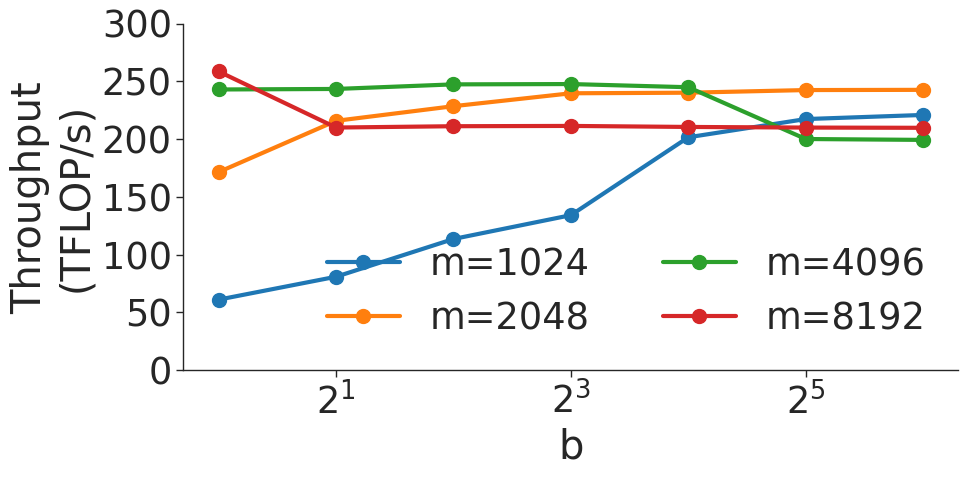

In [7]:
plot_throughputs_base(read_logfilebmm("results/A100b_sweep.out"),
                 label_variable='m',
                 label_variable_values=[1024, 2048, 4096, 8192],
                 xaxis_variable='b',
                 xlabel='b',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200,250,300])
                 #output_filename='../figures/bmm/v100/b_sweep.pdf')

In [8]:
plot_throughputs_base(read_logfilebmm("logs/bmm/v100/b_sweep.out"),
                 label_variable='b',
                 label_variable_values=[1, 2, 4, 8],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100])

FileNotFoundError: [Errno 2] No such file or directory: 'logs/bmm/v100/b_sweep.out'

In [9]:
plot_throughputs_base(read_logfilebmm("logs/bmm/v100/b_and_outer_dim_sweep.out"),
                 label_variable='b',
                 label_variable_values=[1, 4, 16],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100],
                 output_filename="../figures/bmm/v100/b_and_outer_dim_sweep.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'logs/bmm/v100/b_and_outer_dim_sweep.out'

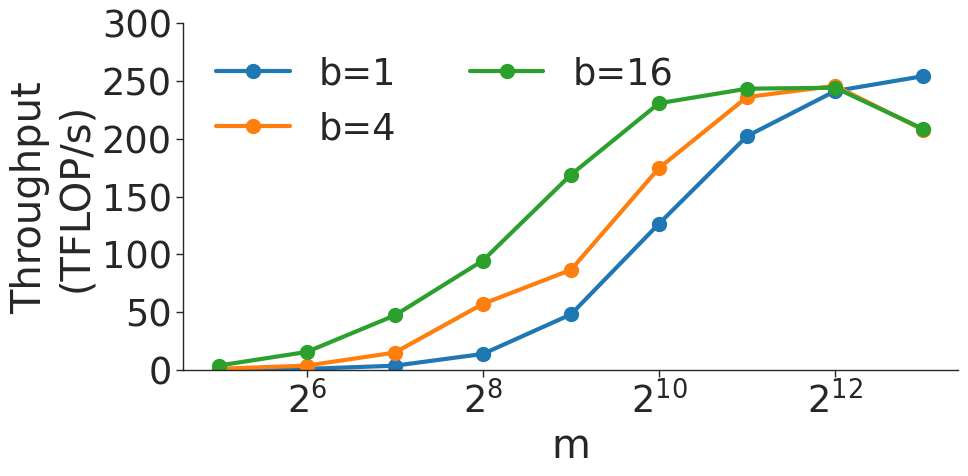

In [10]:
plot_throughputs_base(read_logfilebmm("results/A100b_and_outer_dim_sweep.out"),
                 label_variable='b',
                 label_variable_values=[1, 4, 16],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200, 250,300])
                 #output_filename="../figures/bmm/v100/b_and_outer_dim_sweep.pdf")

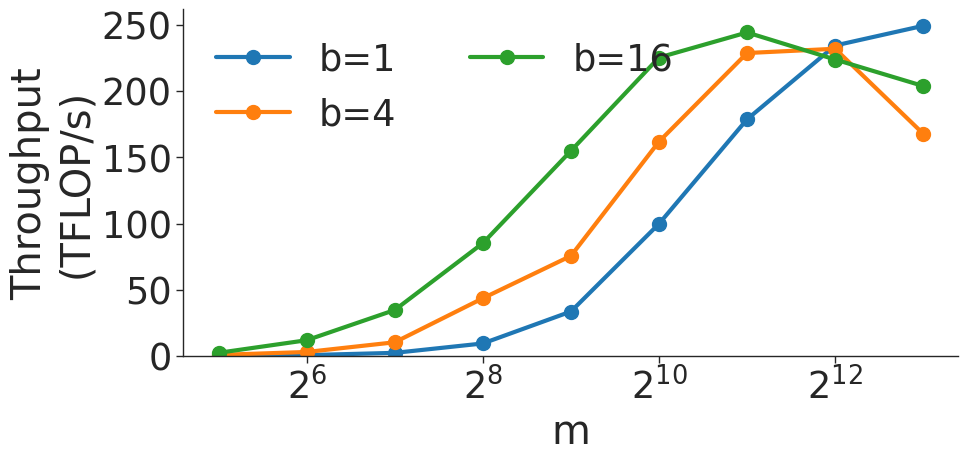

In [ ]:
plot_throughputs_base(read_logfilebmm("results/b_outer_a100_test.out"),
                 label_variable='b',
                 label_variable_values=[1, 4, 16],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200, 250])
                 #output_filename="../figures/bmm/v100/b_and_outer_dim_sweep.pdf")

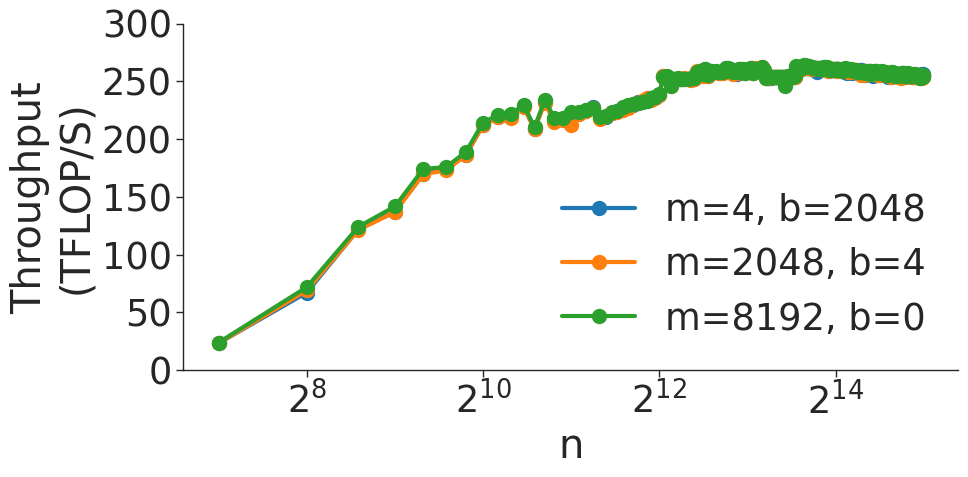

In [ ]:
plot_throughputs_mm_bmm(read_logfile_mm_bmm("results/linear_eq_mm.out"),"m",[4,2048,4*2048],"n","n","Throughput\n(TFLOP/S)",yticks=[0,50,100,150,200,250,300])

[{'b': 4, 'm': 2048, 'n': 64, 'k': 2048, 'throughput': 26.078}, {'b': 4, 'm': 2048, 'n': 128, 'k': 2048, 'throughput': 64.607}, {'b': 4, 'm': 2048, 'n': 192, 'k': 2048, 'throughput': 84.707}, {'b': 4, 'm': 2048, 'n': 256, 'k': 2048, 'throughput': 101.472}, {'b': 4, 'm': 2048, 'n': 320, 'k': 2048, 'throughput': 112.461}, {'b': 4, 'm': 2048, 'n': 384, 'k': 2048, 'throughput': 158.364}, {'b': 4, 'm': 2048, 'n': 448, 'k': 2048, 'throughput': 163.619}, {'b': 4, 'm': 2048, 'n': 512, 'k': 2048, 'throughput': 173.943}, {'b': 4, 'm': 2048, 'n': 576, 'k': 2048, 'throughput': 178.718}, {'b': 4, 'm': 2048, 'n': 640, 'k': 2048, 'throughput': 185.689}, {'b': 4, 'm': 2048, 'n': 704, 'k': 2048, 'throughput': 193.472}, {'b': 4, 'm': 2048, 'n': 768, 'k': 2048, 'throughput': 198.149}, {'b': 4, 'm': 2048, 'n': 832, 'k': 2048, 'throughput': 203.939}, {'b': 4, 'm': 2048, 'n': 896, 'k': 2048, 'throughput': 207.178}, {'b': 4, 'm': 2048, 'n': 960, 'k': 2048, 'throughput': 210.701}, {'b': 4, 'm': 2048, 'n': 102

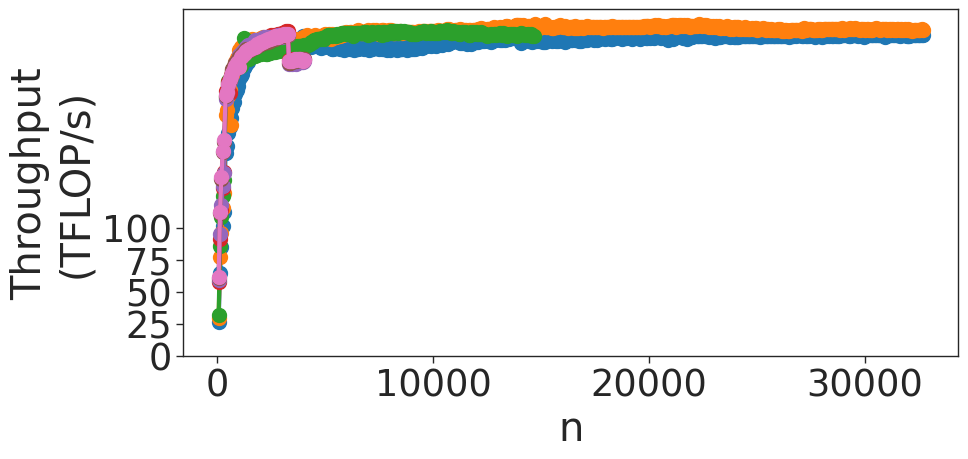

In [12]:
plot_throughputs(read_logfilebmm("results/bmmOutput.txt"),
                 label_variable='b',
                 label_variable_values=2**np.arange(2,9),
                 xaxis_variable='n',
                 xlabel='n',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100],
                 output_filename='../figures/bmm/v100/b_sweep.pdf')

[{'b': 1, 'm': 2048, 'n': 64, 'k': 2048, 'throughput': 11.4}, {'b': 1, 'm': 2048, 'n': 128, 'k': 2048, 'throughput': 23.415}, {'b': 1, 'm': 2048, 'n': 192, 'k': 2048, 'throughput': 34.354}, {'b': 1, 'm': 2048, 'n': 256, 'k': 2048, 'throughput': 43.82}, {'b': 1, 'm': 2048, 'n': 320, 'k': 2048, 'throughput': 51.789}, {'b': 1, 'm': 2048, 'n': 384, 'k': 2048, 'throughput': 60.964}, {'b': 1, 'm': 2048, 'n': 448, 'k': 2048, 'throughput': 68.751}, {'b': 1, 'm': 2048, 'n': 512, 'k': 2048, 'throughput': 73.456}, {'b': 1, 'm': 2048, 'n': 576, 'k': 2048, 'throughput': 82.875}, {'b': 1, 'm': 2048, 'n': 640, 'k': 2048, 'throughput': 87.34}, {'b': 1, 'm': 2048, 'n': 704, 'k': 2048, 'throughput': 93.453}, {'b': 1, 'm': 2048, 'n': 768, 'k': 2048, 'throughput': 98.061}, {'b': 1, 'm': 2048, 'n': 832, 'k': 2048, 'throughput': 105.722}, {'b': 1, 'm': 2048, 'n': 896, 'k': 2048, 'throughput': 109.205}, {'b': 1, 'm': 2048, 'n': 960, 'k': 2048, 'throughput': 113.521}, {'b': 1, 'm': 2048, 'n': 1024, 'k': 2048,

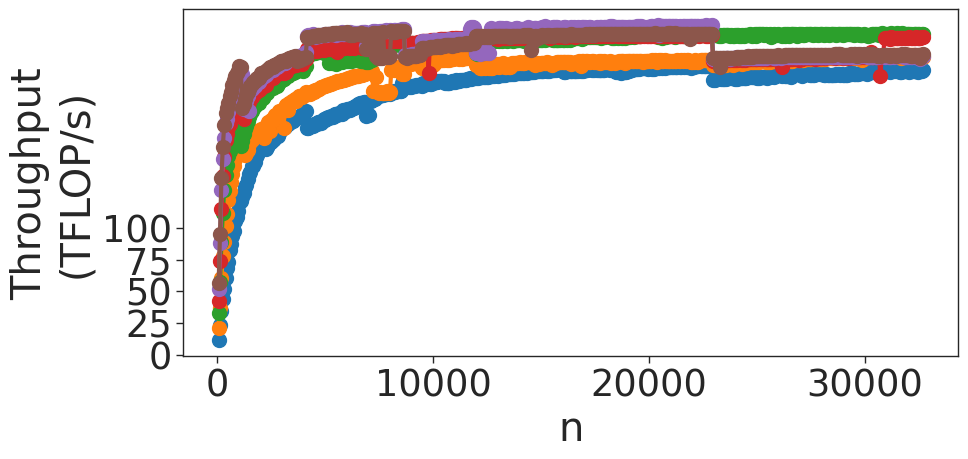

In [13]:
plot_throughputs(read_logfile_mm_bmm("results/mm_b_NBSweep.txt"),
                 label_variable='b',
                 label_variable_values=2**np.arange(6),
                 xaxis_variable='n',
                 xlabel='n',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100])

[{'b': 2048, 'm': 4, 'n': 64, 'k': 64, 'throughput': 1.808}, {'b': 2048, 'm': 4, 'n': 72, 'k': 72, 'throughput': 1.887}, {'b': 2048, 'm': 4, 'n': 80, 'k': 80, 'throughput': 2.301}, {'b': 2048, 'm': 4, 'n': 88, 'k': 88, 'throughput': 3.03}, {'b': 2048, 'm': 4, 'n': 96, 'k': 96, 'throughput': 3.727}, {'b': 2048, 'm': 4, 'n': 104, 'k': 104, 'throughput': 4.345}, {'b': 2048, 'm': 4, 'n': 112, 'k': 112, 'throughput': 4.999}, {'b': 2048, 'm': 4, 'n': 120, 'k': 120, 'throughput': 5.853}, {'b': 2048, 'm': 4, 'n': 128, 'k': 128, 'throughput': 5.947}, {'b': 2048, 'm': 4, 'n': 136, 'k': 136, 'throughput': 7.331}, {'b': 2048, 'm': 4, 'n': 144, 'k': 144, 'throughput': 8.476}, {'b': 2048, 'm': 4, 'n': 152, 'k': 152, 'throughput': 9.384}, {'b': 2048, 'm': 4, 'n': 160, 'k': 160, 'throughput': 10.274}, {'b': 2048, 'm': 4, 'n': 168, 'k': 168, 'throughput': 11.552}, {'b': 2048, 'm': 4, 'n': 176, 'k': 176, 'throughput': 12.644}, {'b': 2048, 'm': 4, 'n': 184, 'k': 184, 'throughput': 14.202}, {'b': 2048, 'm

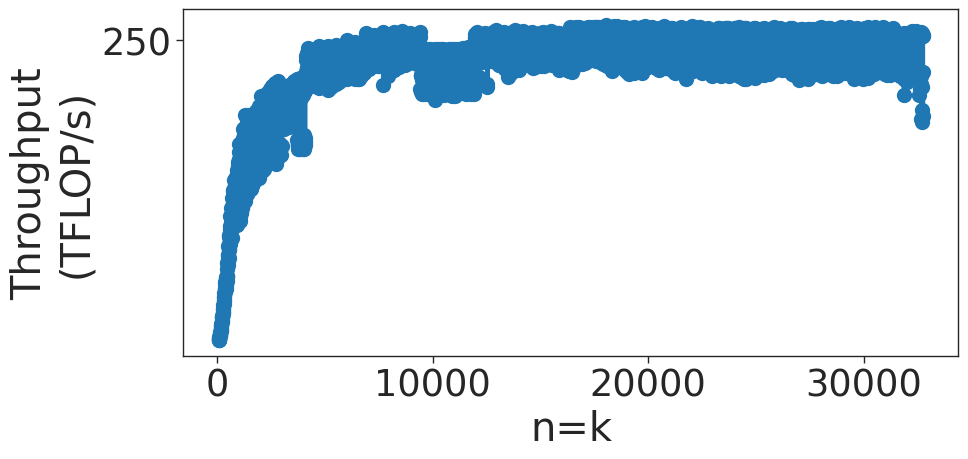

In [14]:
plot_throughputs(read_logfile_mm_bmm("results/mm_b_2048_NKSweep.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='n',
                 xlabel='n=k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[250])

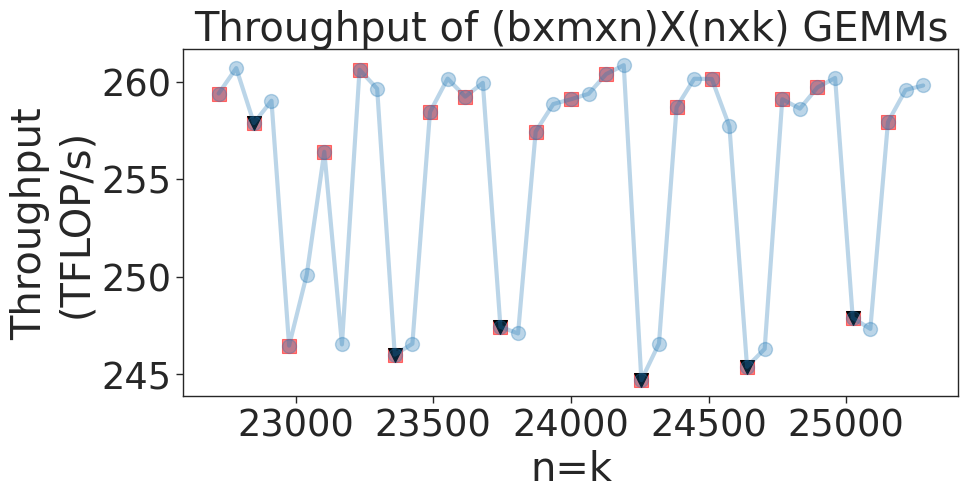

In [15]:
plot_throughputs_with_quant_boundaries(read_logfile_mm_bmm("results/mm_b_2048_NKSweep.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='n',
                 xlabel='n=k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[250])

[{'b': 2048, 'm': 4, 'n': 256, 'k': 64, 'throughput': 9.199}, {'b': 2048, 'm': 4, 'n': 512, 'k': 128, 'throughput': 27.438}, {'b': 2048, 'm': 4, 'n': 768, 'k': 192, 'throughput': 47.424}, {'b': 2048, 'm': 4, 'n': 1024, 'k': 256, 'throughput': 75.981}, {'b': 2048, 'm': 4, 'n': 1280, 'k': 320, 'throughput': 101.403}, {'b': 2048, 'm': 4, 'n': 1536, 'k': 384, 'throughput': 136.791}, {'b': 2048, 'm': 4, 'n': 1792, 'k': 448, 'throughput': 130.383}, {'b': 2048, 'm': 4, 'n': 2048, 'k': 512, 'throughput': 156.787}, {'b': 2048, 'm': 4, 'n': 2304, 'k': 576, 'throughput': 177.573}, {'b': 2048, 'm': 4, 'n': 2560, 'k': 640, 'throughput': 198.407}, {'b': 2048, 'm': 4, 'n': 2816, 'k': 704, 'throughput': 169.775}, {'b': 2048, 'm': 4, 'n': 3072, 'k': 768, 'throughput': 186.17}, {'b': 2048, 'm': 4, 'n': 3328, 'k': 832, 'throughput': 187.233}, {'b': 2048, 'm': 4, 'n': 3584, 'k': 896, 'throughput': 201.531}, {'b': 2048, 'm': 4, 'n': 3840, 'k': 960, 'throughput': 177.404}, {'b': 2048, 'm': 4, 'n': 4096, 'k'

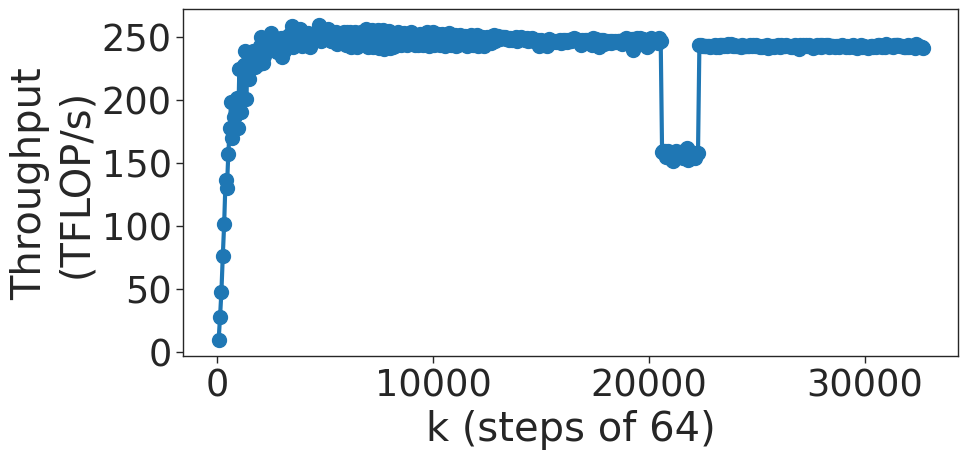

In [16]:
plot_throughputs(read_logfile_mm_bmm("results/mm_4nkSweep_b_2048.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='k',
                 xlabel='k (steps of 64)',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250])

[{'b': 2048, 'm': 4, 'n': 64, 'k': 256, 'throughput': 7.377}, {'b': 2048, 'm': 4, 'n': 128, 'k': 512, 'throughput': 25.975}, {'b': 2048, 'm': 4, 'n': 192, 'k': 768, 'throughput': 51.655}, {'b': 2048, 'm': 4, 'n': 256, 'k': 1024, 'throughput': 79.254}, {'b': 2048, 'm': 4, 'n': 320, 'k': 1280, 'throughput': 103.237}, {'b': 2048, 'm': 4, 'n': 384, 'k': 1536, 'throughput': 124.359}, {'b': 2048, 'm': 4, 'n': 448, 'k': 1792, 'throughput': 139.991}, {'b': 2048, 'm': 4, 'n': 512, 'k': 2048, 'throughput': 156.057}, {'b': 2048, 'm': 4, 'n': 576, 'k': 2304, 'throughput': 166.968}, {'b': 2048, 'm': 4, 'n': 640, 'k': 2560, 'throughput': 177.918}, {'b': 2048, 'm': 4, 'n': 704, 'k': 2816, 'throughput': 188.731}, {'b': 2048, 'm': 4, 'n': 768, 'k': 3072, 'throughput': 191.683}, {'b': 2048, 'm': 4, 'n': 832, 'k': 3328, 'throughput': 200.558}, {'b': 2048, 'm': 4, 'n': 896, 'k': 3584, 'throughput': 205.529}, {'b': 2048, 'm': 4, 'n': 960, 'k': 3840, 'throughput': 203.226}, {'b': 2048, 'm': 4, 'n': 1024, 'k

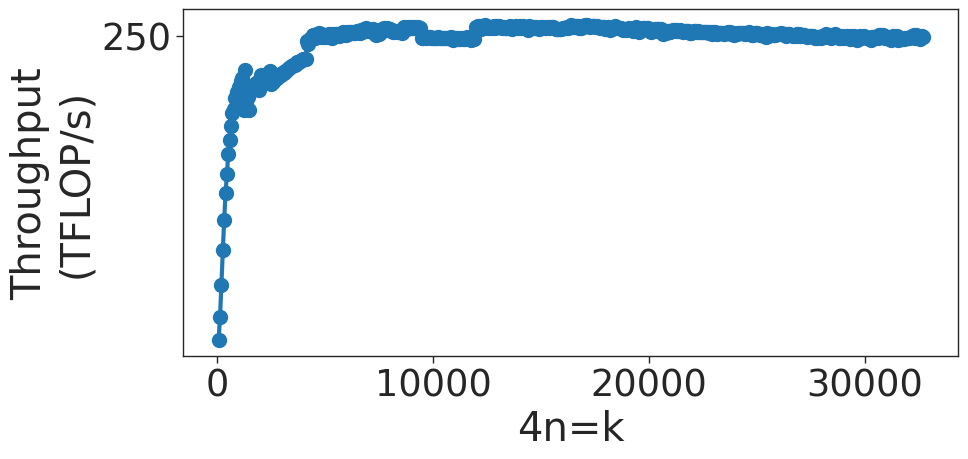

In [17]:
plot_throughputs(read_logfile_mm_bmm("results/mm_n4kSweep_b_2048.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='n',
                 xlabel='4n=k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[250])

[{'b': 2048, 'm': 4, 'n': 64, 'k': 192, 'throughput': 5.523}, {'b': 2048, 'm': 4, 'n': 128, 'k': 384, 'throughput': 21.572}, {'b': 2048, 'm': 4, 'n': 192, 'k': 576, 'throughput': 40.537}, {'b': 2048, 'm': 4, 'n': 256, 'k': 768, 'throughput': 66.363}, {'b': 2048, 'm': 4, 'n': 320, 'k': 960, 'throughput': 94.514}, {'b': 2048, 'm': 4, 'n': 384, 'k': 1152, 'throughput': 117.59}, {'b': 2048, 'm': 4, 'n': 448, 'k': 1344, 'throughput': 108.626}, {'b': 2048, 'm': 4, 'n': 512, 'k': 1536, 'throughput': 131.374}, {'b': 2048, 'm': 4, 'n': 576, 'k': 1728, 'throughput': 142.752}, {'b': 2048, 'm': 4, 'n': 640, 'k': 1920, 'throughput': 164.599}, {'b': 2048, 'm': 4, 'n': 704, 'k': 2112, 'throughput': 158.429}, {'b': 2048, 'm': 4, 'n': 768, 'k': 2304, 'throughput': 170.526}, {'b': 2048, 'm': 4, 'n': 832, 'k': 2496, 'throughput': 185.83}, {'b': 2048, 'm': 4, 'n': 896, 'k': 2688, 'throughput': 182.136}, {'b': 2048, 'm': 4, 'n': 960, 'k': 2880, 'throughput': 198.705}, {'b': 2048, 'm': 4, 'n': 1024, 'k': 30

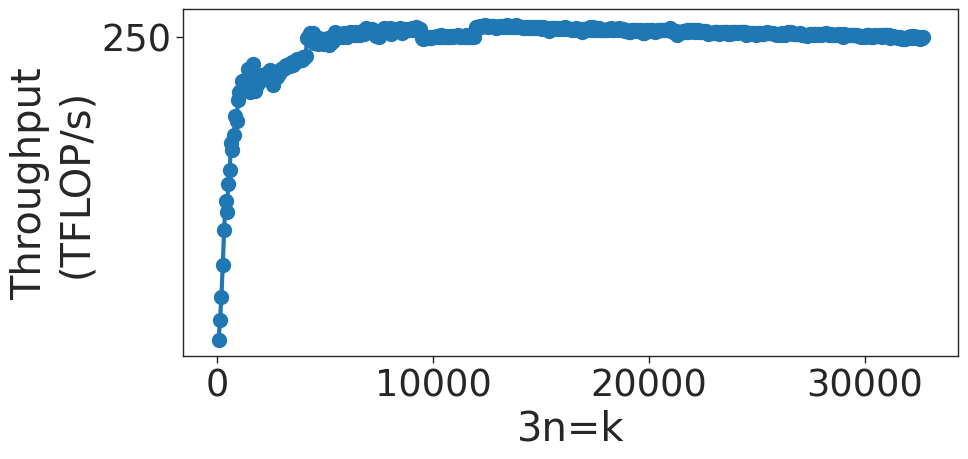

In [18]:
plot_throughputs(read_logfile_mm_bmm("results/mm_n3kSweep_b_2048.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='n',
                 xlabel='3n=k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[250])

[{'b': 2048, 'm': 4, 'n': 128, 'k': 64, 'throughput': 4.535}, {'b': 2048, 'm': 4, 'n': 256, 'k': 128, 'throughput': 11.993}, {'b': 2048, 'm': 4, 'n': 384, 'k': 192, 'throughput': 29.158}, {'b': 2048, 'm': 4, 'n': 512, 'k': 256, 'throughput': 23.225}, {'b': 2048, 'm': 4, 'n': 640, 'k': 320, 'throughput': 57.299}, {'b': 2048, 'm': 4, 'n': 768, 'k': 384, 'throughput': 92.43}, {'b': 2048, 'm': 4, 'n': 896, 'k': 448, 'throughput': 97.963}, {'b': 2048, 'm': 4, 'n': 1024, 'k': 512, 'throughput': 120.695}, {'b': 2048, 'm': 4, 'n': 1152, 'k': 576, 'throughput': 136.108}, {'b': 2048, 'm': 4, 'n': 1280, 'k': 640, 'throughput': 158.779}, {'b': 2048, 'm': 4, 'n': 1408, 'k': 704, 'throughput': 151.61}, {'b': 2048, 'm': 4, 'n': 1536, 'k': 768, 'throughput': 169.135}, {'b': 2048, 'm': 4, 'n': 1664, 'k': 832, 'throughput': 155.093}, {'b': 2048, 'm': 4, 'n': 1792, 'k': 896, 'throughput': 168.309}, {'b': 2048, 'm': 4, 'n': 1920, 'k': 960, 'throughput': 170.03}, {'b': 2048, 'm': 4, 'n': 2048, 'k': 1024, '

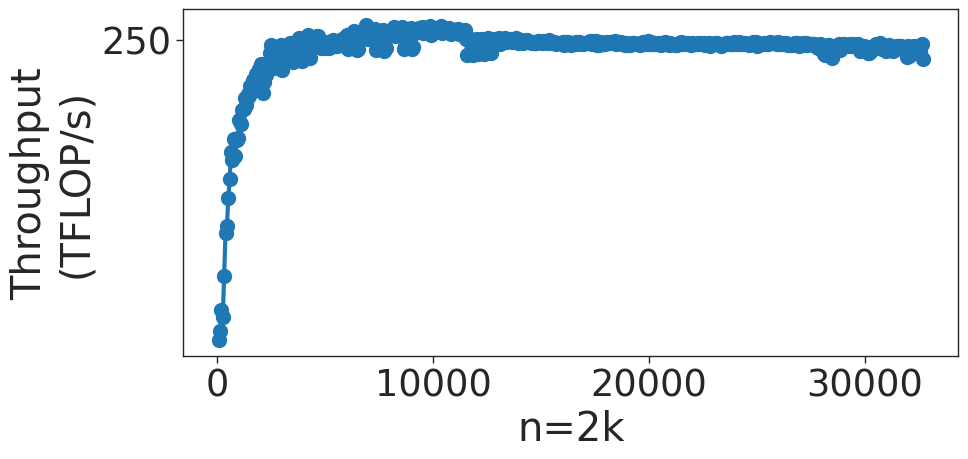

In [19]:
plot_throughputs(read_logfile_mm_bmm("results/mm_2nkSweep_b_2048.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='k',
                 xlabel='n=2k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[250])

[{'b': 2048, 'm': 4, 'n': 192, 'k': 64, 'throughput': 6.932}, {'b': 2048, 'm': 4, 'n': 384, 'k': 128, 'throughput': 20.92}, {'b': 2048, 'm': 4, 'n': 576, 'k': 192, 'throughput': 37.192}, {'b': 2048, 'm': 4, 'n': 768, 'k': 256, 'throughput': 61.823}, {'b': 2048, 'm': 4, 'n': 960, 'k': 320, 'throughput': 87.563}, {'b': 2048, 'm': 4, 'n': 1152, 'k': 384, 'throughput': 110.575}, {'b': 2048, 'm': 4, 'n': 1344, 'k': 448, 'throughput': 112.808}, {'b': 2048, 'm': 4, 'n': 1536, 'k': 512, 'throughput': 135.176}, {'b': 2048, 'm': 4, 'n': 1728, 'k': 576, 'throughput': 162.478}, {'b': 2048, 'm': 4, 'n': 1920, 'k': 640, 'throughput': 183.674}, {'b': 2048, 'm': 4, 'n': 2112, 'k': 704, 'throughput': 155.478}, {'b': 2048, 'm': 4, 'n': 2304, 'k': 768, 'throughput': 186.605}, {'b': 2048, 'm': 4, 'n': 2496, 'k': 832, 'throughput': 172.492}, {'b': 2048, 'm': 4, 'n': 2688, 'k': 896, 'throughput': 185.871}, {'b': 2048, 'm': 4, 'n': 2880, 'k': 960, 'throughput': 187.507}, {'b': 2048, 'm': 4, 'n': 3072, 'k': 1

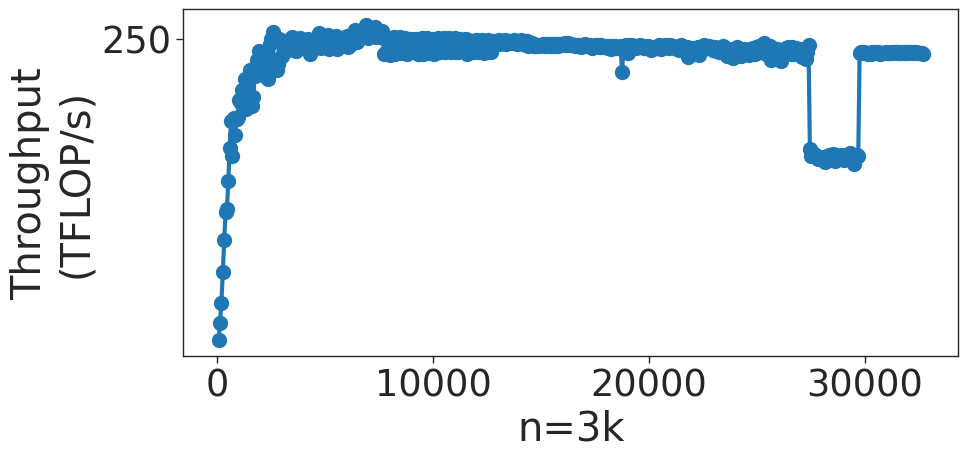

In [20]:
plot_throughputs(read_logfile_mm_bmm("results/mm_3nkSweep_b_2048.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='k',
                 xlabel='n=3k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[250])

[{'b': 1, 'm': 8192, 'n': 51200, 'k': 14272, 'throughput': 253.732}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14273, 'throughput': 72.046}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14274, 'throughput': 171.974}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14275, 'throughput': 72.047}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14276, 'throughput': 172.501}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14277, 'throughput': 72.035}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14278, 'throughput': 172.27}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14279, 'throughput': 72.033}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14280, 'throughput': 258.921}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14281, 'throughput': 71.974}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14282, 'throughput': 172.689}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14283, 'throughput': 72.032}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14284, 'throughput': 173.033}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14285, 'throughput': 71.957}, {'b': 1, 'm': 8192, 'n': 51200, 'k': 14286, 'throughput

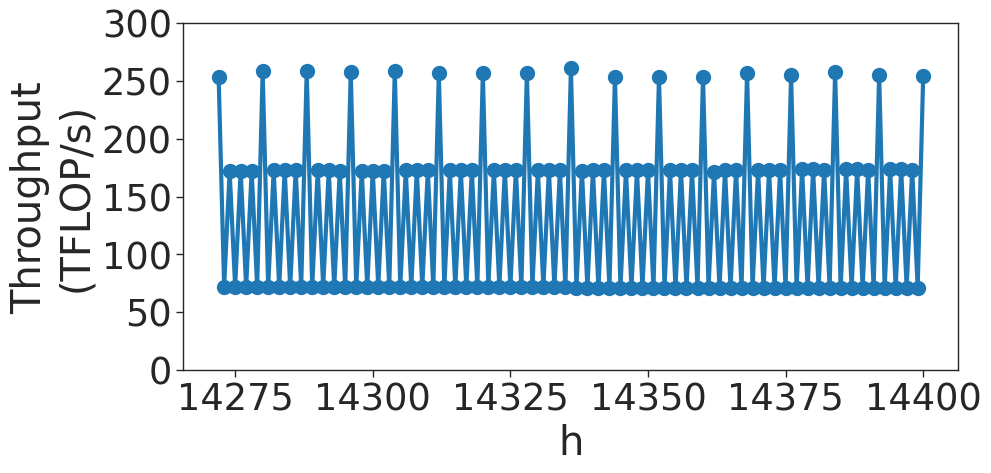

In [21]:
plot_throughputs(read_logfile_mm_bmm("results/vocab_h_sweep.out"),
                 label_variable='n',
                 label_variable_values=[51200],
                 xaxis_variable='k',
                 xlabel='h',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250,300])

[{'b': 1, 'm': 8192, 'n': 51136, 'k': 14336, 'throughput': 255.388}, {'b': 1, 'm': 8192, 'n': 51137, 'k': 14336, 'throughput': 76.096}, {'b': 1, 'm': 8192, 'n': 51138, 'k': 14336, 'throughput': 136.919}, {'b': 1, 'm': 8192, 'n': 51139, 'k': 14336, 'throughput': 74.685}, {'b': 1, 'm': 8192, 'n': 51140, 'k': 14336, 'throughput': 138.379}, {'b': 1, 'm': 8192, 'n': 51141, 'k': 14336, 'throughput': 74.808}, {'b': 1, 'm': 8192, 'n': 51142, 'k': 14336, 'throughput': 137.807}, {'b': 1, 'm': 8192, 'n': 51143, 'k': 14336, 'throughput': 73.491}, {'b': 1, 'm': 8192, 'n': 51144, 'k': 14336, 'throughput': 227.943}, {'b': 1, 'm': 8192, 'n': 51145, 'k': 14336, 'throughput': 73.627}, {'b': 1, 'm': 8192, 'n': 51146, 'k': 14336, 'throughput': 137.763}, {'b': 1, 'm': 8192, 'n': 51147, 'k': 14336, 'throughput': 75.508}, {'b': 1, 'm': 8192, 'n': 51148, 'k': 14336, 'throughput': 139.381}, {'b': 1, 'm': 8192, 'n': 51149, 'k': 14336, 'throughput': 74.832}, {'b': 1, 'm': 8192, 'n': 51150, 'k': 14336, 'throughpu

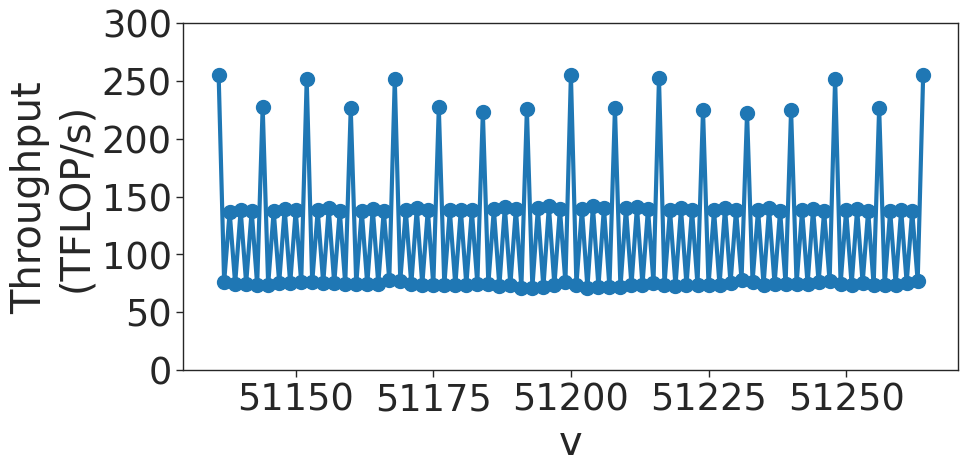

In [ ]:
plot_throughputs(read_logfile_mm_bmm("results/vocab_v_sweep.out"),
                 label_variable='k',
                 label_variable_values=[14336],
                 xaxis_variable='n',
                 xlabel='v',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250,300])

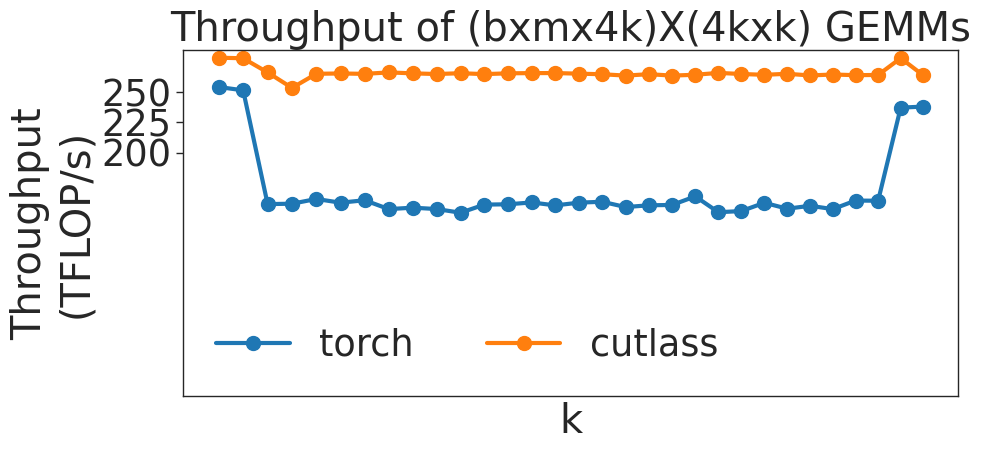

In [22]:
plot_throughputs_cutlass_v_torch(read_logfile_mm_bmm("results/torch_4h_to_h_drop.txt"),
                                 read_logfile_mm_bmm("results/cutlassBmmBench.txt"),
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='k',
                 xlabel='k',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[200,225,250])

In [ ]:
plot_throughputs_multiple([read_logfile_mm_bmm("results/mm_4nkSweep_b_2048.txt"),
                                 read_logfile_mm_bmm("results/cutlassBmmSweep.txt")],
                 label_variable='b',
                 label_variable_values=[2048],
                 xaxis_variable='k',
                 xlabel='k (steps of 64) \n(dip: [20608, 22272])',
                 ylabel='Throughput\n(TFLOP/s)',
                 labels=["torch","cutlass"],
                 yticks=[50,100,150,200,250])

: 